<a href="https://colab.research.google.com/github/MaxGama/DataScience/blob/master/BREXIT_Um_olhar_da_Ciencia_de_dados(Dados_AirBnB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importar as Bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import locale
import folium
from folium import plugins
from folium.features import DivIcon
from folium.plugins import HeatMap

In [0]:
#Carregar os Arquivos CSV
df_londres = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2019-11-05/visualisations/listings.csv")
df_paris = pd.read_csv ("http://data.insideairbnb.com/france/ile-de-france/paris/2019-11-07/visualisations/listings.csv")
df_madri = pd.read_csv ("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2019-11-09/visualisations/listings.csv")
df_lisboa = pd.read_csv ("http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-11-28/visualisations/listings.csv")

In [4]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
a = (df_londres.isnull().sum() / df_londres.shape[0]).sort_values(ascending=False) 
df_formatado = pd.DataFrame(a)
df_formatado.style.format("{:.2%}")

,0
neighbourhood_group,100.00%
reviews_per_month,23.52%
last_review,23.52%
name,0.03%
host_name,0.01%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%


In [0]:
# Excluir a coluna 'neighbourhood_group', que está 100% vazia
df_londres.drop(labels='neighbourhood_group', axis=1, inplace=True)

In [0]:
# Os registros que possuem valores vazios também serão eliminados
df_londres.dropna(how='any', inplace=True)

In [7]:
# Criar um DataFrame somente com as colunas 'Room_Type e 'Price'
df_uk = df_londres.copy()
df_uk = df_uk[['room_type','price']]
df_uk.head()

,room_type,price
0,Entire home/apt,88
1,Private room,65
2,Entire home/apt,105
3,Entire home/apt,100
4,Private room,77


In [8]:
# Porcentagem de cada tipo de imóvel disponível
Total = df_londres.room_type.value_counts() / df_londres.shape[0]
df_formatado = pd.DataFrame(Total)
df_formatado.style.format("{:.2%}")

,room_type
Entire home/apt,56.71%
Private room,41.33%
Hotel room,1.34%
Shared room,0.62%


In [9]:
# Média das acomodações disponíveis
df_uk.groupby(['room_type']).price.mean().sort_values(ascending=False)


room_type
Hotel room         201.110472
Entire home/apt    152.845026
Private room        52.325510
Shared room         39.790123
Name: price, dtype: float64

In [0]:
# Processar os outros DataFrames das demais cidades

df_paris.drop(labels='neighbourhood_group', axis=1, inplace=True)
df_madri.drop(labels='neighbourhood_group', axis=1, inplace=True)
df_lisboa.drop(labels='neighbourhood_group', axis=1, inplace=True)

df_paris.dropna(how='any', inplace=True)
df_madri.dropna(how='any', inplace=True)
df_lisboa.dropna(how='any', inplace=True)

df_fr = df_paris.copy()
df_fr = df_fr[['room_type','price']] #Paris

df_es = df_madri.copy()
df_es = df_es[['room_type','price']] #Madri

df_pt = df_lisboa.copy()
df_pt = df_pt[['room_type','price']] #Lisboa


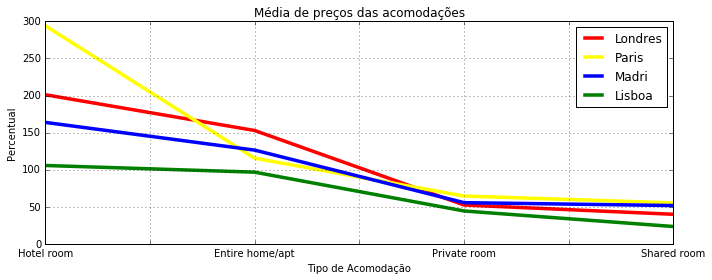

In [11]:
# Criar um gráfico com os dados dos Preços Médios das acomodações nas cidades
fig, ax = plt.subplots(figsize=(10,4))
(df_uk.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax, label='Londres', linewidth=3.5, color="red")
(df_fr.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax, label='Paris', linewidth=3.5, color="yellow")
(df_es.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax, label='Madri', linewidth=3.5, color="blue")
(df_pt.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax, label='Lisboa', linewidth=3.5, color="green")

ax.set_title("Média de preços das acomodações")
ax.set_xlabel('Tipo de Acomodação')
ax.set_ylabel('Percentual')
ax.legend(loc='upper right')

ax.grid();
plt.tight_layout()

In [26]:
# Filtrar somente as acomodações que tenham a média superior a 1.50% de Reviews por mês
media_neighbourhood = df_londres.groupby('neighbourhood').mean()
nomes_neighbourhood = media_neighbourhood[media_neighbourhood.reviews_per_month >= 1.50].index
print(nomes_neighbourhood)
df_londres_review = df_londres[df_londres['neighbourhood'].isin(nomes_neighbourhood)]
df_londres_review.head(5)

Index(['Hillingdon'], dtype='object', name='neighbourhood')


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
257,271122,Heathrow BNB - Home Away From Home!,1419096,Claudia,Hillingdon,51.53085,-0.39970,Private room,30,1,7,2017-05-27,0.09,4,0
486,307923,"Double room no 1 near Brunel, Uxbridge, Heathrow",1584404,Rubina,Hillingdon,51.52293,-0.46245,Private room,31,1,84,2019-07-07,0.88,2,93
1528,713741,Heathrow Express A calm after storm,1419096,Claudia,Hillingdon,51.53252,-0.40130,Private room,27,1,4,2016-12-07,0.05,4,157
1530,713758,Airport Connections - Heathrow,1419096,Claudia,Hillingdon,51.53161,-0.40174,Private room,30,1,6,2017-05-04,0.07,4,157
1538,670667,Open Plan 1 Bedroom nr Heathrow.,3398477,Dr. P.Sanehi,Hillingdon,51.48074,-0.42043,Entire home/apt,75,14,93,2017-03-17,1.46,2,365


In [21]:
# Criar um mapa com as marcações das acomodações
latitude = df_londres_review.latitude.values
longitude = df_londres_review.longitude.values
nomes = df_londres_review.name.values

# criar um mapa
mapa = folium.Map(location=[51.5116722,-0.408801],
                  zoom_start=12, )
# adicionar pontos (markers) ao mapa
for lat, lon in zip(latitude, longitude):
  folium.Marker(
                location=[lat,lon],
                icon=folium.Icon(icon_color='yellow')
              ).add_to(mapa)
marker = folium.CircleMarker(location=[list(zip(latitude, longitude))])
marker.add_to(mapa)
# exibir mapa final com os pontos
mapa

In [27]:
# Criar um mapa de calor com as acomidações 
latitude = df_londres_review.latitude.values
longitude = df_londres_review.longitude.values
nomes = df_londres_review.name.values

# criar um mapa
mapa = folium.Map(location=[51.5116722,-0.408801],
                  zoom_start=12, )

HeatMap(list(zip(latitude, longitude))).add_to(mapa)

mapa
